Questions

Possible to first combine variables before creating cubes? or should they be done sparately and then combined 

- should check which patterns are the same for each year and month, for example will the Boolean mask for each grid cell be the same? 

- weights for pfts prolly vary by year, these could probably be merged in some way? ex. find average 

- same with TSA  - think about how to merge 

- but the Boolean mask for extracting values should be the same between years/months 

Todos: 

- Check if the Boolean mask for each grid cell is the same between years 

- Then regroup and see what to do 

Other Thoughts 

- Should end all variables with (month) (year); for example, 0115 = January 2015 

In [1]:
# Imports 
%matplotlib inline
import os, glob
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
cd /glade/work/joyceyang

/glade/work/joyceyang


In [3]:
# File Name Generator 
def filename_generator(season, start_date, end_date):
    if season == 'winter':
        months = ['-12', '-01', '-02']
    elif season == 'summer': 
        months = ['-06', '-07', '-08']
    else: 
        print('give a season')
    
    prefix = 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.'
    
    years = list(str(i) for i in range(start_date, end_date+1))
    suffix = '.nc'
    filenames = [prefix+year+month+suffix for month in months for year in years]
    return filenames     

In [4]:
filename_generator('winter', 2015, 2024)

['clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-12.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2016-12.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2017-12.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2018-12.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2019-12.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2020-12.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2021-12.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2022-12.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2023-12.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2024-12.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-01.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2016-01.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2017-01.nc',
 'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_S

In [5]:
nc1 = xr.open_dataset('clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-01.nc')
nc2 = xr.open_dataset('clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-02.nc')
nc3 = xr.open_dataset('clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-12.nc')

# Sanity Check

In [250]:
# check if Boolean mask is the same between years (within the same grid cell)
# Import 01-2015, 12-2018 and 02-2024 to check 
# pick random pairs of lat/lon and check if the Boolean masks are equal 
# first check tsa, then check wt 
landunit = np.random.randint(7,10)
i = np.random.randint(1,289)
j = np.random.randint(1,193)

# Set up variables 

tsa1 = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==landunit)
wt1 = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==landunit)

tsa2 = nc2.TSA.squeeze().where(nc2.pfts1d_itype_lunit==landunit)
wt2 = nc2.pfts1d_wtlunit.where(nc2.pfts1d_itype_lunit==landunit)

tsa3 = nc3.TSA.squeeze().where(nc3.pfts1d_itype_lunit==landunit)
wt3 = nc3.pfts1d_wtlunit.where(nc3.pfts1d_itype_lunit==landunit)

# Create masks and extract values from masks 

vmask1 = (np.isnan(tsa1.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
v1 = wt1[vmask1].values
vmask2 = (np.isnan(tsa2.where(nc2.pfts1d_ixy==i).where(nc2.pfts1d_jxy==j)) == False)
v2 = wt2[vmask2].values
vmask3 = (np.isnan(tsa3.where(nc3.pfts1d_ixy==i).where(nc3.pfts1d_jxy==j)) == False)
v3 = wt3[vmask3].values

# See if masks and values are equal 

print(v1, v2, v3)

# print result 

[0.80000001 0.06666666 0.06666666 0.05       0.01666667] [0.80000001 0.06666666 0.06666666 0.05       0.01666667] [0.80000001 0.06666666 0.06666666 0.05       0.01666667]


In [141]:
(vmask2.values == vmask3.values).sum() ## masks are equal 

800154

# Load Files

In [6]:
%%time
# Load previously created files 
lat_grid = np.load('lat_grid.npy')
lon_grid = np.load('lon_grid.npy')
tsa_cube_veg = np.load('tsa_cube_veg.npy')
tsa_wtlunit_cube_veg = np.load('tsa_wtlunit_cube_veg.npy')
tsa_cube_TBD = np.load('tsa_cube_TBD.npy')
tsa_wtlunit_cube_TBD = np.load('tsa_wtlunit_cube_TBD.npy')
tsa_cube_HD = np.load('tsa_cube_HD.npy')
tsa_wtlunit_cube_HD = np.load('tsa_wtlunit_cube_HD.npy')
tsa_cube_MD = np.load('tsa_cube_MD.npy')
tsa_wtlunit_cube_MD = np.load('tsa_wtlunit_cube_MD.npy')
tsa_grid_veg = np.load('tsa_grid_veg.npy')
tsa_grid_TBD = np.load('tsa_grid_TBD.npy')
tsa_grid_HD = np.load('tsa_grid_HD.npy')
tsa_grid_MD = np.load('tsa_grid_MD.npy')
wtlunit_gcell_grid_TBD = np.load('wtlunit_gcell_grid_TBD.npy')
wtlunit_gcell_grid_HD = np.load('wtlunit_gcell_grid_HD.npy')
wtlunit_gcell_grid_MD = np.load('wtlunit_gcell_grid_MD.npy')
urban_tot = np.load('urban_tot.npy')

CPU times: user 7.99 ms, sys: 84.7 ms, total: 92.6 ms
Wall time: 1.17 s


In [7]:
%%time
class Graph(): 
    def Plot(title, figname, variable):
        fig, axes = plt.subplots(figsize=(20,10)) # initialize plot of size 20x10
        ax = plt.axes(projection=ccrs.PlateCarree()) # define projection as Plate Carree
        ax.add_feature(cfeature.BORDERS, linestyle=':') # add in country borders
        ax.set_global() # set map extent to global 
        ax.coastlines() # add in coastlines 
        plt.tight_layout()
        
        c = variable - 273 # convert to Celsius 
        
        plt.scatter(lon_grid, lat_grid, c=c, transform=ccrs.PlateCarree(), s=10, marker='s')

        plt.title(title, size=20)
        cbar = plt.colorbar(shrink=0.6) # create colorbar 
        cbar.set_label('Temperature (C)    ', rotation=270)

        plt.savefig(figname)
        

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 37.4 µs


# Test

In [8]:
%%time 
landunit = 9

tsa1 = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==landunit)
wt1 = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==landunit)

tsa2 = nc2.TSA.squeeze().where(nc2.pfts1d_itype_lunit==landunit)
wt2 = nc2.pfts1d_wtlunit.where(nc2.pfts1d_itype_lunit==landunit)

tsa3 = nc3.TSA.squeeze().where(nc3.pfts1d_itype_lunit==landunit)
wt3 = nc3.pfts1d_wtlunit.where(nc3.pfts1d_itype_lunit==landunit)

tsa_cube11 = np.full((288,192,15), np.nan)
tsa_cube12 = np.full((288,192,15), np.nan)
tsa_cube13 = np.full((288,192,15), np.nan)
wt_cube11 = np.full((288,192,15), np.nan)
wt_cube12 = np.full((288,192,15), np.nan)
wt_cube13 = np.full((288,192,15), np.nan)

for i in range(1, 289):
    for j in range(1, 193):
        vmask1 = (np.isnan(tsa1.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v1 = tsa1[vmask1].values
        v2 = tsa2[vmask1].values
        v3 = tsa3[vmask1].values
        w1 = wt1[vmask1].values
        w2 = wt2[vmask1].values
        w3 = wt3[vmask1].values
        for k in range(len(v1)):
            tsa_cube11[i-1,j-1,k] = v1[k]
            tsa_cube12[i-1,j-1,k] = v2[k]
            tsa_cube13[i-1,j-1,k] = v3[k]
            wt_cube11[i-1,j-1,k] = w1[k]
            wt_cube12[i-1,j-1,k] = w2[k]
            wt_cube13[i-1,j-1,k] = w3[k]

cube1 = np.mean([tsa_cube11, tsa_cube12, tsa_cube13], axis=0)
cube2 = np.mean([wt_cube11, wt_cube12, wt_cube13], axis=0)

CPU times: user 12min 45s, sys: 119 ms, total: 12min 45s
Wall time: 12min 46s


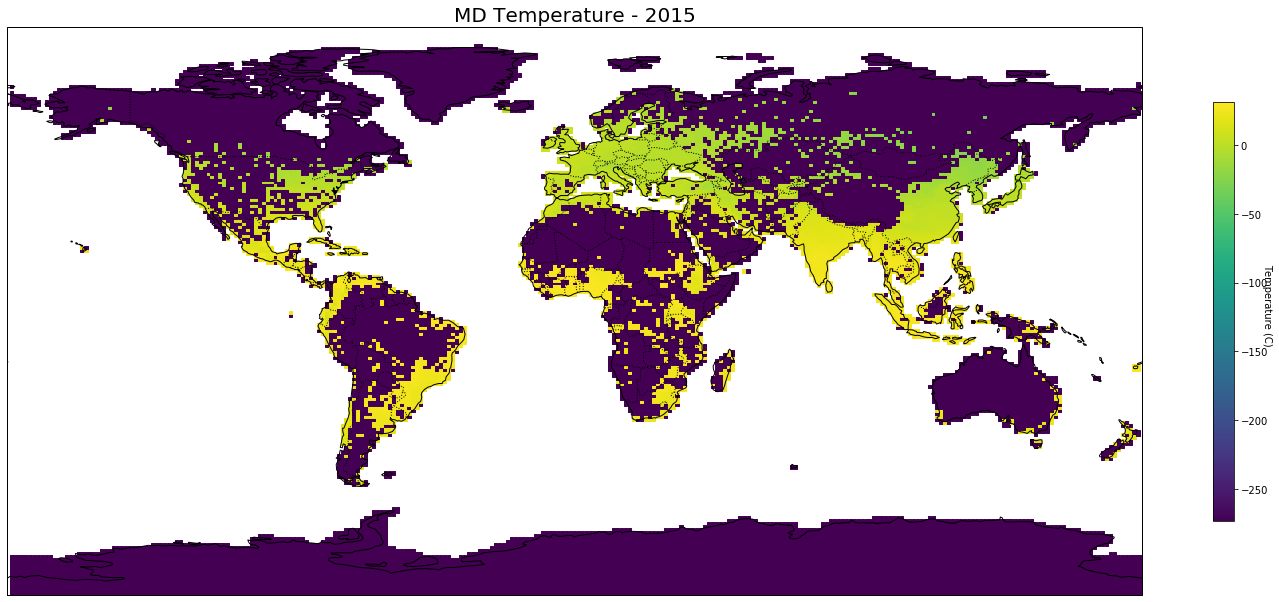

In [33]:
grid1 = np.nansum((np.multiply(cube1, cube2)), axis=2)
title = 'MD Temperature - 2015'
figname = 'Test.jpg'
variable = grid1 
Graph.Plot(title, figname, variable)

In [9]:
%%time 
# Mask 2
landunit = 9

tsa1 = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==landunit)
wt1 = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==landunit)

tsa2 = nc2.TSA.squeeze().where(nc2.pfts1d_itype_lunit==landunit)
wt2 = nc2.pfts1d_wtlunit.where(nc2.pfts1d_itype_lunit==landunit)

tsa3 = nc3.TSA.squeeze().where(nc3.pfts1d_itype_lunit==landunit)
wt3 = nc3.pfts1d_wtlunit.where(nc3.pfts1d_itype_lunit==landunit)

tsa_cube11 = np.full((288,192,15), np.nan)
tsa_cube12 = np.full((288,192,15), np.nan)
tsa_cube13 = np.full((288,192,15), np.nan)
wt_cube11 = np.full((288,192,15), np.nan)
wt_cube12 = np.full((288,192,15), np.nan)
wt_cube13 = np.full((288,192,15), np.nan)

for i in range(1, 289):
    for j in range(1, 193):
        vmask2 = (np.isnan(tsa2.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v1 = tsa1[vmask2].values
        v2 = tsa2[vmask2].values
        v3 = tsa3[vmask2].values
        w1 = wt1[vmask2].values
        w2 = wt2[vmask2].values
        w3 = wt3[vmask2].values
        for k in range(len(v1)):
            tsa_cube11[i-1,j-1,k] = v1[k]
            tsa_cube12[i-1,j-1,k] = v2[k]
            tsa_cube13[i-1,j-1,k] = v3[k]
            wt_cube11[i-1,j-1,k] = w1[k]
            wt_cube12[i-1,j-1,k] = w2[k]
            wt_cube13[i-1,j-1,k] = w3[k]

cube3 = np.mean([tsa_cube11, tsa_cube12, tsa_cube13], axis=0)
cube4 = np.mean([wt_cube11, wt_cube12, wt_cube13], axis=0)

CPU times: user 11min 2s, sys: 36 ms, total: 11min 2s
Wall time: 11min 3s


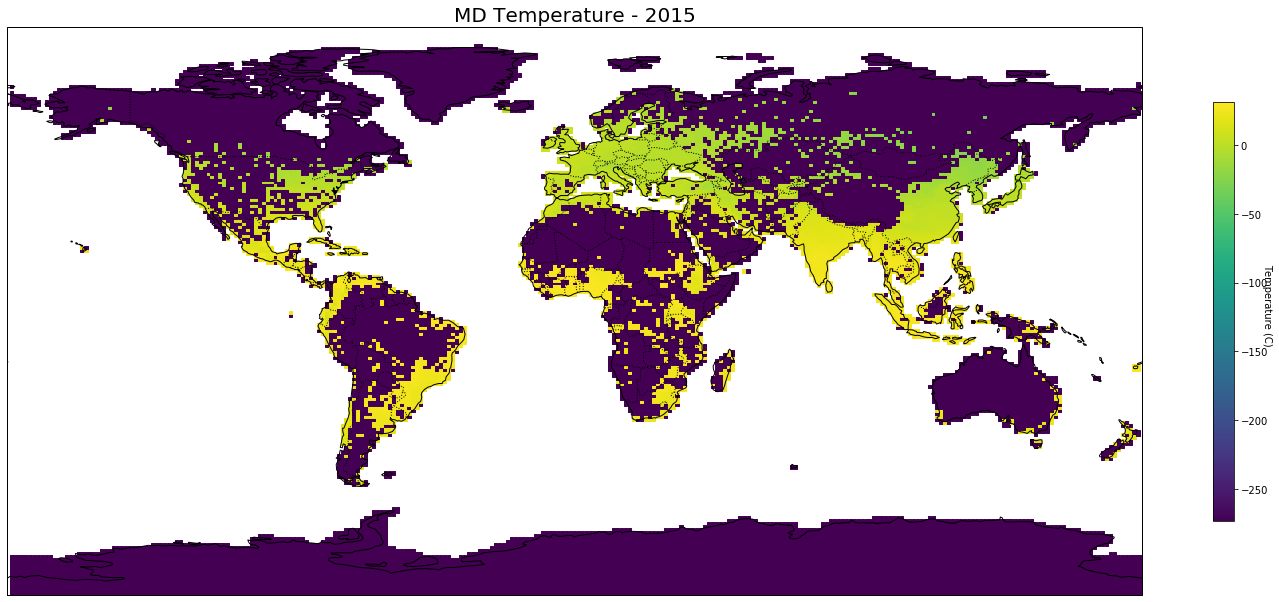

In [35]:
grid3 = np.nansum((np.multiply(cube3, cube4)), axis=2)
title = 'MD Temperature - 2015'
figname = 'Test.jpg'
variable = grid3 
Graph.Plot(title, figname, variable)

In [10]:
%%time 
# Mask 3
landunit = 9

tsa1 = nc1.TSA.squeeze().where(nc1.pfts1d_itype_lunit==landunit)
wt1 = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==landunit)

tsa2 = nc2.TSA.squeeze().where(nc2.pfts1d_itype_lunit==landunit)
wt2 = nc2.pfts1d_wtlunit.where(nc2.pfts1d_itype_lunit==landunit)

tsa3 = nc3.TSA.squeeze().where(nc3.pfts1d_itype_lunit==landunit)
wt3 = nc3.pfts1d_wtlunit.where(nc3.pfts1d_itype_lunit==landunit)

tsa_cube11 = np.full((288,192,15), np.nan)
tsa_cube12 = np.full((288,192,15), np.nan)
tsa_cube13 = np.full((288,192,15), np.nan)
wt_cube11 = np.full((288,192,15), np.nan)
wt_cube12 = np.full((288,192,15), np.nan)
wt_cube13 = np.full((288,192,15), np.nan)

for i in range(1, 289):
    for j in range(1, 193):
        vmask3 = (np.isnan(tsa3.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j)) == False)
        v1 = tsa1[vmask3].values
        v2 = tsa2[vmask3].values
        v3 = tsa3[vmask3].values
        w1 = wt1[vmask3].values
        w2 = wt2[vmask3].values
        w3 = wt3[vmask3].values
        for k in range(len(v1)):
            tsa_cube11[i-1,j-1,k] = v1[k]
            tsa_cube12[i-1,j-1,k] = v2[k]
            tsa_cube13[i-1,j-1,k] = v3[k]
            wt_cube11[i-1,j-1,k] = w1[k]
            wt_cube12[i-1,j-1,k] = w2[k]
            wt_cube13[i-1,j-1,k] = w3[k]

cube5 = np.mean([tsa_cube11, tsa_cube12, tsa_cube13], axis=0)
cube6 = np.mean([wt_cube11, wt_cube12, wt_cube13], axis=0)

CPU times: user 11min 8s, sys: 28 ms, total: 11min 8s
Wall time: 11min 9s


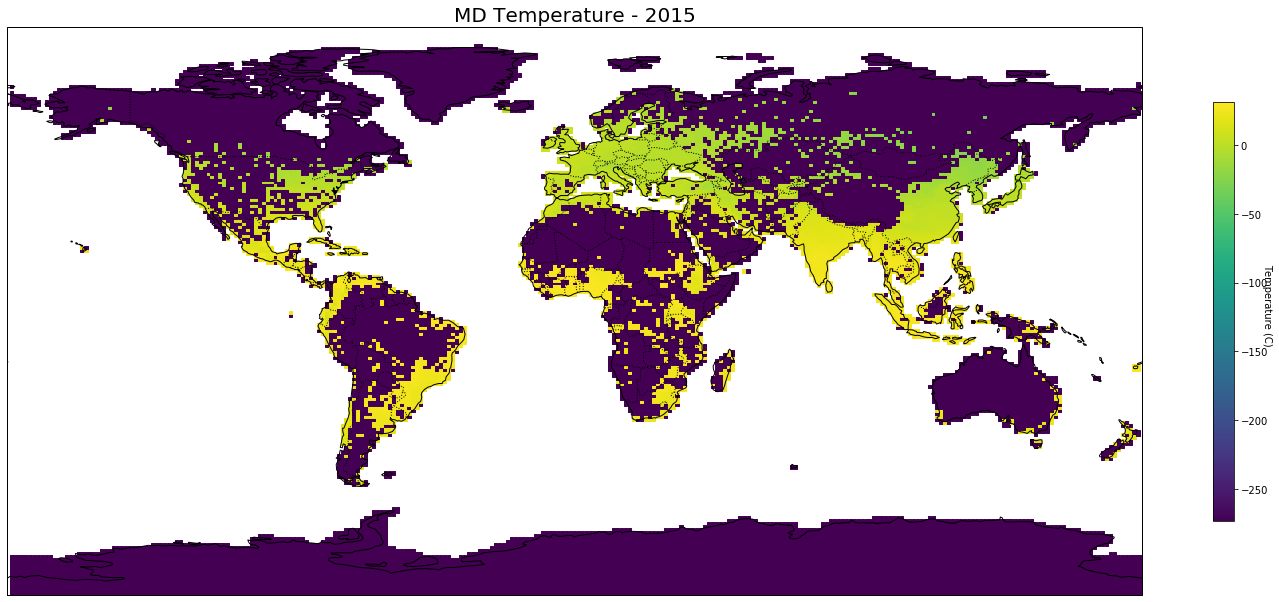

In [37]:
grid5 = np.nansum((np.multiply(cube5, cube6)), axis=2)
title = 'MD Temperature - 2015'
figname = 'Test.jpg'
variable = grid5 
Graph.Plot(title, figname, variable)

# Test mf_opendataset

In [39]:
files = ['clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-01.nc', 
         'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-02.nc', 
         'clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-12.nc']

In [90]:
nc_ = xr.open_mfdataset(files, combine='by_coords')

In [115]:
nc_

<xarray.Dataset>
Dimensions:             (column: 505972, gridcell: 21013, hist_interval: 2, landunit: 62100, lat: 192, levdcmp: 25, levgrnd: 25, levlak: 10, lon: 288, nvegwcs: 4, pft: 800154, time: 3)
Coordinates:
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.325 44.775
  * lon                 (lon) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * lat                 (lat) float32 -90.0 -89.057594 ... 89.057594 90.0
  * levdcmp             (levdcmp) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * time                (time) object 2015-02-01 00:00:00 ... 2016-01-01 00:00:00
Dimensions without coordinates: column, gridcell, hist_interval, landunit, nvegwcs, pft
Data variables:
    mcdate              (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec               (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur               (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mscur               (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nstep               (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds         (time, hist_interval) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    date_written        (time) |S16 dask.array<chunksize=(1,), meta=np.ndarray>
    time_written        (time) |S16 dask.array<chunksize=(1,), meta=np.ndarray>
    area                (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    landfrac            (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    landmask            (time, lat, lon) float64 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    pftmask             (time, lat, lon) float64 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    nbedrock            (time, lat, lon) float64 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    grid1d_lon          (time, gridcell) float64 dask.array<chunksize=(1, 21013), meta=np.ndarray>
    grid1d_lat          (time, gridcell) float64 dask.array<chunksize=(1, 21013), meta=np.ndarray>
    grid1d_ixy          (time, gridcell) int32 dask.array<chunksize=(1, 21013), meta=np.ndarray>
    grid1d_jxy          (time, gridcell) int32 dask.array<chunksize=(1, 21013), meta=np.ndarray>
    land1d_lon          (time, landunit) float64 dask.array<chunksize=(1, 62100), meta=np.ndarray>
    land1d_lat          (time, landunit) float64 dask.array<chunksize=(1, 62100), meta=np.ndarray>
    land1d_ixy          (time, landunit) int32 dask.array<chunksize=(1, 62100), meta=np.ndarray>
    land1d_jxy          (time, landunit) int32 dask.array<chunksize=(1, 62100), meta=np.ndarray>
    land1d_wtgcell      (time, landunit) float64 dask.array<chunksize=(1, 62100), meta=np.ndarray>
    land1d_ityplunit    (time, landunit) int32 dask.array<chunksize=(1, 62100), meta=np.ndarray>
    land1d_active       (time, landunit) int32 dask.array<chunksize=(1, 62100), meta=np.ndarray>
    cols1d_lon          (time, column) float64 dask.array<chunksize=(1, 505972), meta=np.ndarray>
    cols1d_lat          (time, column) float64 dask.array<chunksize=(1, 505972), meta=np.ndarray>
    cols1d_ixy          (time, column) int32 dask.array<chunksize=(1, 505972), meta=np.ndarray>
    cols1d_jxy          (time, column) int32 dask.array<chunksize=(1, 505972), meta=np.ndarray>
    cols1d_wtgcell      (time, column) float64 dask.array<chunksize=(1, 505972), meta=np.ndarray>
    cols1d_wtlunit      (time, column) float64 dask.array<chunksize=(1, 505972), meta=np.ndarray>
    cols1d_itype_col    (time, column) int32 dask.array<chunksize=(1, 505972), meta=np.ndarray>
    cols1d_itype_lunit  (time, column) int32 dask.array<chunksize=(1, 505972), meta=np.ndarray>
    cols1d_active       (time, column) int32 dask.array<chunksize=(1, 505972), meta=np.ndarray>
    pfts1d_lon          (time, pft) float64 dask.array<chunksize=(1, 800154), m

In [113]:
tsa_ = nc_.TSA.where(nc_.pfts1d_itype_lunit==9).mean(dim='time')
wt_ = nc_.pfts1d_wtlunit.where(nc_.pfts1d_itype_lunit==9).mean(dim='time')
ixy = nc_.pfts1d_ixy.mean(dim='time')
jxy = nc_.pfts1d_jxy.mean(dim='time')

#tsa_ = tsa_.mean(dim='time')

tsa_cube_ = np.full((288,192,15), np.nan)
wt_cube_ = np.full((288,192,15), np.nan)

In [114]:
wt_

<xarray.DataArray 'pfts1d_wtlunit' (pft: 800154)>
dask.array<mean_agg-aggregate, shape=(800154,), dtype=float64, chunksize=(800154,)>
Dimensions without coordinates: pft

In [112]:
np.isnan(tsa_.where(ixy==i).where(jxy==j)) == False

<xarray.DataArray 'TSA' (pft: 800154, time: 3)>
dask.array<eq, shape=(800154, 3), dtype=bool, chunksize=(800154, 1)>
Coordinates:
  * time     (time) object 2015-02-01 00:00:00 ... 2016-01-01 00:00:00
Dimensions without coordinates: pft

In [104]:
i = 100
j = 150
vmask = (np.isnan(tsa_.where(ixy==i).where(jxy==j)) == False)
print(vmask)
v = tsa_[vmask]

<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [99]:
for i in range(1,20):
    for j in range(1,20):
        vmask = (np.isnan(tsa_.where(ixy==i).where(jxy==j)) == False)
        print(vmask)
        #v = tsa_[vmask].values
        #print(v)
        #w = wt_[vmask].values
        #for k in range(len(v)):
            #tsa_cube_[i-1,j-1,k] = v[k]
            #wt_cube_[i-1,j-1,k] = w[k]

#grid_ = np.nansum((np.multiply(tsa_cube_, wt_cube_)), axis=2)

#title = 'MD Temperature mf_opendataset - 2015 Winter'
#figname = 'test.jpg'
#variable = grid_
#Graph.Plot(title, figname, variable)

<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TSA' (pft: 800154)>
dask.array<eq, shape=(800154,), dtype=bool, chunksize=(800154,)>
Dimensions without coordinates: pft


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


KeyboardInterrupt: 